In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
train_X = pd.read_csv(filepath_or_buffer='dataTraining_X.csv',header=None,names=['x1','x2','x3','x4','x5','x6'])
train_Y = pd.read_csv(filepath_or_buffer='dataTraining_Y.csv',header=None,names = ['y'])
test_X = pd.read_csv(filepath_or_buffer='dataTesting_X.csv',header=None,names=['x1','x2','x3','x4','x5','x6'])
test_Y = pd.read_csv(filepath_or_buffer='dataTesting_Y.csv',header=None, names = ['y'])

In [3]:
X_train = train_X[['x1','x2','x3','x4','x5','x6']].values
Y_train = train_Y['y'].values
X_test = test_X[['x1','x2','x3','x4','x5','x6']].values
Y_test = test_Y['y'].values
print(X_train[0].shape)

(6,)


In [4]:
aa = np.array([4,3,2,2,5,2,3])
bb = np.argsort(aa)
print(np.arange(1,16))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [5]:
def knn_clf(x_train,y_train,x_test,y_test,k=3,ytie=1):
    y_pred = np.zeros_like(y_test)
    for i in range(x_test.shape[0]):
        xtst = x_test[i]
        dk = np.zeros_like(y_train,dtype=float)
        for j in range(x_train.shape[0]):
            dk[j] = LA.norm((xtst - x_train[j]))
        dk_argsort = np.argsort(dk)
        idx_k = dk_argsort[:k]
        y_k = y_train[idx_k]
        count_0 = len(y_k[y_k==0])
        count_1 = len(y_k[y_k==1])
        if (count_0>count_1):
            y_pred[i] = 0
        elif (count_1>count_0):
            y_pred[i] = 1
        elif (count_1==count_0):
            y_pred[i] = ytie
    
    test_err = mean_squared_error(y_test,y_pred)
    return test_err
        
    

In [6]:
karr = np.arange(1,16)
train_err_1 = np.zeros_like(karr,dtype=float)
test_err_1 = np.zeros_like(karr,dtype=float)
train_err_0 = np.zeros_like(karr,dtype=float)
test_err_0 = np.zeros_like(karr,dtype=float)
for i in range(len(karr)):
    test_err_1[i] = knn_clf(X_train,Y_train,X_test,Y_test,karr[i],1)
    train_err_1[i] = knn_clf(X_train,Y_train,X_train,Y_train,karr[i],1)
    test_err_0[i] = knn_clf(X_train,Y_train,X_test,Y_test,karr[i],0)
    train_err_0[i] = knn_clf(X_train,Y_train,X_train,Y_train,karr[i],0)

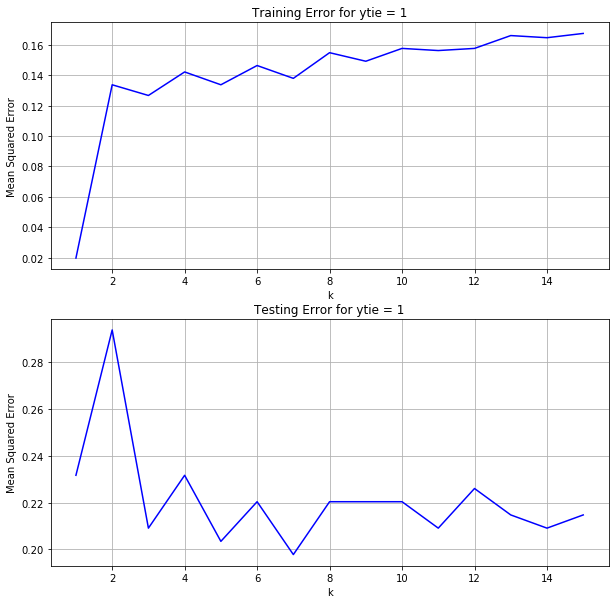

In [7]:
plt.subplot(2,1,1)
plt.plot(karr,train_err_1,'b')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('Training Error for ytie = 1')
plt.grid(b=True)
    
plt.subplot(2,1,2)
plt.plot(karr,test_err_1,'b')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('Testing Error for ytie = 1')
plt.grid(b=True)

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

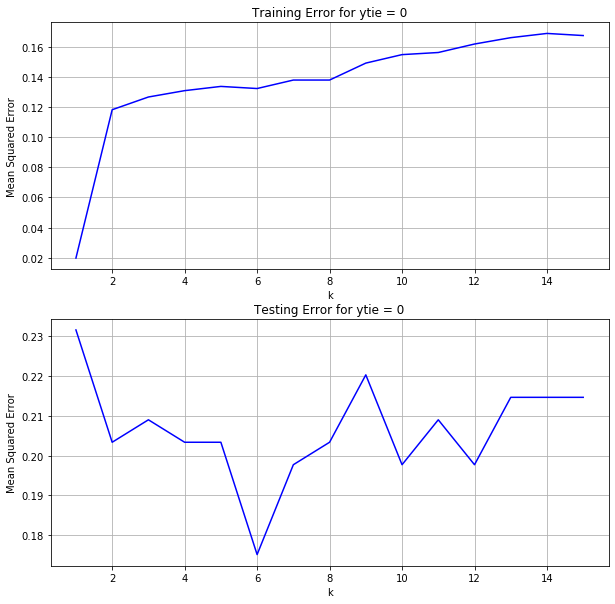

In [8]:
plt.subplot(2,1,1)
plt.plot(karr,train_err_0,'b')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('Training Error for ytie = 0')
plt.grid(b=True)
    
plt.subplot(2,1,2)
plt.plot(karr,test_err_0,'b')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('Testing Error for ytie = 0')
plt.grid(b=True)

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()